# Graph Neural Networks to Predict Missing Virus-Host Links

In [1]:
import os
import pandas as pd
import torch

from torch_geometric import seed_everything
seed_everything(12345)

## Set up dfencoder

In [2]:
#these are our libraries
from dfencoder import AutoEncoder
import numpy as np
import pandas as pd

#and, for pretty visualiations...
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.set()
# %config InlineBackend.figure_format = 'retina'

In [3]:
#load and look at the data
virus_df = pd.read_csv('../../data/divide_and_conquer/final_virus_features_bool.csv')

#this dataset contains nulls and ' ?'. Let's make these all nulls.
virus_df = virus_df.map(lambda x: np.nan if x==' ?' else x)

#drop columns we do not want to encode
virus_df.drop(columns=["pathogenid","ncbi.name"], axis=1, inplace=True)

virus_df.dtypes
virus_df.head()

,rna,rt,double_stranded,negative_sense,positive_sense,enveloped,circular,segmented,cytoplasm,size_KB,...,environment,vector,release_budding,release_lysis,release_other,CE_clathrin,CE_receptor,ce_glycoprotiens,ce_other,samplingEffort
0,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
1,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
2,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
3,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
4,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1


In [4]:
#divide data into training and testing
virus_train = virus_df.sample(frac=.8, random_state=42)
virus_test = virus_df.loc[~virus_df.index.isin(virus_train.index)]

X_train_v = virus_train
X_val_v = virus_test

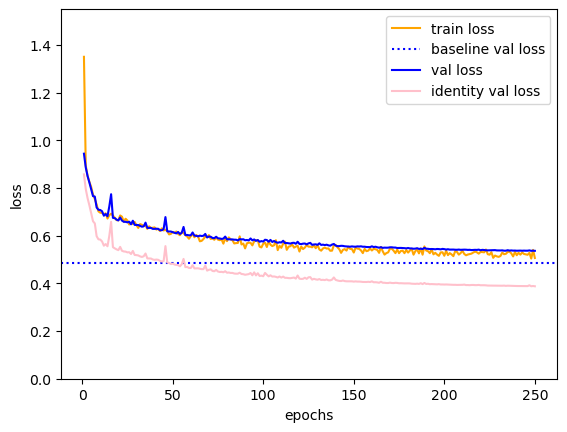

In [5]:
#build model
virus_model = AutoEncoder(
    encoder_layers = [30, 128, 30], #model architecture
    decoder_layers = [], #decoder optional - you can create bottlenecks if you like
    activation='relu',
    swap_p=0.2, #noise parameter
    lr = 0.01,
    lr_decay=0.99,
    batch_size=32,
    logger='ipynb', #special logging for jupyter notebooks
    verbose=False,
    optimizer='sgd',
    scaler='gauss_rank', #gauss rank scaling forces your numeric features into standard normal distributions
    min_cats=0 #Define cutoff for minority categories, default 10
)
virus_model.fit(X_train_v, epochs=250, val=X_val_v)

In [6]:
test_df_v = virus_df.loc[:4]
test_df_v

,rna,rt,double_stranded,negative_sense,positive_sense,enveloped,circular,segmented,cytoplasm,size_KB,...,environment,vector,release_budding,release_lysis,release_other,CE_clathrin,CE_receptor,ce_glycoprotiens,ce_other,samplingEffort
0,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
1,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
2,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
3,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1
4,True,False,False,False,True,False,False,False,True,6.001923,...,False,False,True,False,False,False,True,False,False,1


In [7]:
rep = virus_model.get_representation(test_df_v)
rep

tensor([[4.4710e+00, 6.6057e-01, 3.2522e+00, 0.0000e+00, 6.1379e+00, 4.6454e-01,
         0.0000e+00, 2.5337e+00, 4.0706e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.8944e+00, 4.0624e+00, 5.2111e-01, 1.4428e+00, 0.0000e+00,
         4.3807e-03, 3.0533e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2083e+00,
         0.0000e+00, 2.9247e-01, 5.1364e-03, 9.1650e-01, 3.3832e+00, 0.0000e+00],
        [4.4710e+00, 6.6057e-01, 3.2522e+00, 0.0000e+00, 6.1379e+00, 4.6454e-01,
         0.0000e+00, 2.5337e+00, 4.0706e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.8944e+00, 4.0624e+00, 5.2111e-01, 1.4428e+00, 0.0000e+00,
         4.3807e-03, 3.0533e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2083e+00,
         0.0000e+00, 2.9247e-01, 5.1364e-03, 9.1650e-01, 3.3832e+00, 0.0000e+00],
        [4.4710e+00, 6.6057e-01, 3.2522e+00, 0.0000e+00, 6.1379e+00, 4.6454e-01,
         0.0000e+00, 2.5337e+00, 4.0706e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.894

Mammal dfencoder model

In [8]:
#load and look at the data
mammal_df = pd.read_csv('../../data/divide_and_conquer/final_mammal_features_bool.csv')

#this dataset contains nulls and ' ?'. Let's make these all nulls.
mammal_df = mammal_df.map(lambda x: np.nan if x==' ?' else x)
# df.drop(columns=["Unnamed: 0", "scientific name", "alternative name", "taxid"], axis=1, inplace=True)
mammal_df.drop(columns=["hostid","host"], axis=1, inplace=True)

mammal_df.dtypes
mammal_df.head()

,horder,hfamily,longevity,bodyMass,bodyLength,litterpy,littersize,weaning,gestation,smaturity,...,trees_needle,trees_other,veg_herbal,veg_managed,veg_flooded,crop,pasture,mamdiv,land_cover_entropy,urban_agri_entropy
0,monotremata,tachyglossidae,600.0,4499.97,375.00,0.58,1.00,200.0,22.0,556.85,...,0.000000,4.152361,6.489167,0.192986,0.000694,0.000000,0.281135,28.0,1.112279,0.721329
1,didelphimorphia,didelphidae,84.0,1134.75,402.70,2.00,6.20,94.0,12.0,200.88,...,0.002986,1.542014,0.437222,3.518819,0.448819,0.006443,0.037709,180.0,0.332577,0.432043
2,didelphimorphia,didelphidae,52.9,425.81,265.60,3.00,4.60,82.0,71.5,220.25,...,0.002222,1.370556,0.344861,3.552708,0.487431,0.006623,0.033827,178.0,0.321715,0.445816
3,dasyuromorphia,dasyuridae,156.7,8202.25,557.86,1.00,3.00,243.0,26.0,777.31,...,0.377431,4.805556,3.425833,7.328542,0.183750,0.008363,0.157158,34.0,1.179076,0.377121
4,diprotodontia,macropodidae,202.8,11815.75,646.01,1.80,1.01,214.0,29.0,404.77,...,0.000000,32.950903,2.752778,0.583611,0.008403,0.000018,0.021418,47.0,1.016220,0.294432


In [9]:
mammal_train = mammal_df.sample(frac=.8, random_state=42)
mammal_test = mammal_df.loc[~mammal_df.index.isin(mammal_train.index)]

X_train_m = mammal_train
X_val_m = mammal_test

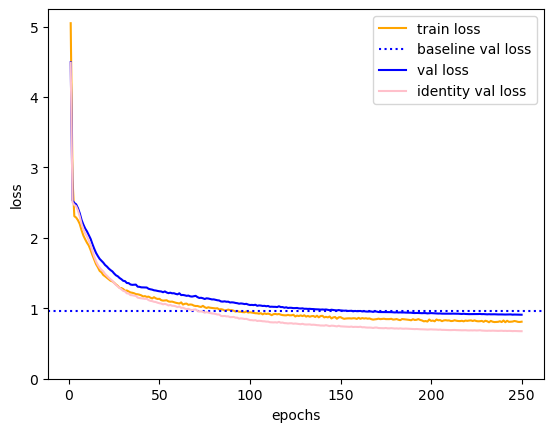

In [10]:
mammal_model = AutoEncoder(
    encoder_layers = [66, 128, 66], #model architecture
    decoder_layers = [], #decoder optional - you can create bottlenecks if you like
    activation='relu',
    swap_p=0.2, #noise parameter
    lr = 0.01,
    lr_decay=0.99,
    batch_size=32,
    logger='ipynb', #special logging for jupyter notebooks
    verbose=False,
    optimizer='sgd',
    scaler='gauss_rank', #gauss rank scaling forces your numeric features into standard normal distributions
    min_cats=0 #Define cutoff for minority categories, default 10
)
mammal_model.fit(X_train_m, epochs=250, val=X_val_m)

In [11]:
test_m_df = mammal_df.loc[:4]
test_m_df

,horder,hfamily,longevity,bodyMass,bodyLength,litterpy,littersize,weaning,gestation,smaturity,...,trees_needle,trees_other,veg_herbal,veg_managed,veg_flooded,crop,pasture,mamdiv,land_cover_entropy,urban_agri_entropy
0,monotremata,tachyglossidae,600.0,4499.97,375.00,0.58,1.00,200.0,22.0,556.85,...,0.000000,4.152361,6.489167,0.192986,0.000694,0.000000,0.281135,28.0,1.112279,0.721329
1,didelphimorphia,didelphidae,84.0,1134.75,402.70,2.00,6.20,94.0,12.0,200.88,...,0.002986,1.542014,0.437222,3.518819,0.448819,0.006443,0.037709,180.0,0.332577,0.432043
2,didelphimorphia,didelphidae,52.9,425.81,265.60,3.00,4.60,82.0,71.5,220.25,...,0.002222,1.370556,0.344861,3.552708,0.487431,0.006623,0.033827,178.0,0.321715,0.445816
3,dasyuromorphia,dasyuridae,156.7,8202.25,557.86,1.00,3.00,243.0,26.0,777.31,...,0.377431,4.805556,3.425833,7.328542,0.183750,0.008363,0.157158,34.0,1.179076,0.377121
4,diprotodontia,macropodidae,202.8,11815.75,646.01,1.80,1.01,214.0,29.0,404.77,...,0.000000,32.950903,2.752778,0.583611,0.008403,0.000018,0.021418,47.0,1.016220,0.294432


In [12]:
rep = mammal_model.get_representation(test_m_df)
rep

tensor([[ 0.9684,  1.1947,  2.2032,  0.0000, 11.9752, 20.8043,  0.0807,  4.4012,
          1.2941,  9.3716,  4.4456,  0.0399, 11.3513, 11.0569,  6.1985,  5.8197,
          2.8375,  0.0986,  0.0000,  0.0000,  9.3445,  9.0467,  0.0000,  9.9838,
          9.1520,  0.0000,  4.7566,  3.3554,  0.2770,  0.0000,  0.0000,  0.0000,
          3.0697,  2.0727,  8.6952, 15.8267,  0.0000,  3.4840,  0.0000,  0.7242,
          2.2890,  0.0000,  0.0000,  3.1044,  0.0000,  0.0000,  7.5055,  0.0000,
          0.0000,  0.0000,  7.6646,  0.0000,  9.6671,  0.0000,  2.4957,  5.4000,
          0.0000,  0.0000,  0.0000,  8.4754,  8.9903,  4.1000,  6.5998, 11.4311,
         11.8442,  0.0000],
        [ 6.2786,  5.2655,  6.7365,  0.0000,  7.7647,  2.0963,  8.9234,  4.3069,
          0.0000,  6.6502,  0.1821,  0.0000, 19.4119,  6.7851,  4.2765,  6.3937,
          4.3549,  6.2578,  0.0000,  0.0000,  1.8619,  4.2717,  0.0000,  7.4549,
          3.2110,  0.0000,  0.0000,  5.4825,  7.4704,  2.5769,  0.0000,  0.0000,


## Mammalian Data from Divide & Conquer

In [13]:
host_features_path = os.path.join('..', '..', 'data', 'divide_and_conquer', 'final_mammal_features_bool.csv')
viral_features_path = os.path.join('..', '..', 'data', 'divide_and_conquer', 'final_virus_features_bool.csv')
interactions_path = os.path.join('..', '..', 'data', 'divide_and_conquer', 'final_interactions.csv')

host_feats = pd.read_csv(host_features_path)
viral_feats = pd.read_csv(viral_features_path)
interactions = pd.read_csv(interactions_path)

This implementation is informed by the following PyG [tutorial](https://medium.com/@pytorch_geometric/link-prediction-on-heterogeneous-graphs-with-pyg-6d5c29677c70). The pathogen and host ID values uniquely identify the entities in our study, but they're also massive numbers. For data compactness, we will create a mapping from those to consecutive values in the range [0, num_entries].

In [14]:
unique_host_ids = host_feats['hostid'].unique()
host_id_mapping = pd.DataFrame(data={
    'hostID': unique_host_ids,
    'mappedID': pd.RangeIndex(len(unique_host_ids))
})
print("Head of the host id mapping DF:\n", host_id_mapping.head())

unique_virus_ids = viral_feats['pathogenid'].unique()
virus_id_mapping = pd.DataFrame(data={
    'virusID': unique_virus_ids,
    'mappedID': pd.RangeIndex(len(unique_virus_ids))
})
print("\nHead of the virus id mapping DF:\n", virus_id_mapping.head())

Head of the host id mapping DF:
     hostID  mappedID
0  3433010         0
1  3433020         1
2  3433026         2
3  3433081         3
4  3433091         4

Head of the virus id mapping DF:
    virusID  mappedID
0  1195280         0
1  1195281         1
2  1195282         2
3  1195283         3
4  1195284         4


Now for interactions, we will create a torch matrix of shape ```(2, num_interactions)```. To do this, we will first use merges to get the corresponding mappedIDs.

In [15]:
interactions_host_ids = pd.merge(interactions['hostID'], host_id_mapping, left_on='hostID', right_on='hostID', how='left')
interactions_host_ids = torch.from_numpy(interactions_host_ids['mappedID'].values)

interactions_virus_ids = pd.merge(interactions['pathogenID'], virus_id_mapping, left_on='pathogenID', right_on='virusID', how='left')
interactions_virus_ids = torch.from_numpy(interactions_virus_ids['mappedID'].values)

edge_index_virus_to_host = torch.stack([interactions_virus_ids, interactions_host_ids], dim=0)
print(edge_index_virus_to_host.shape)

torch.Size([2, 6192])


PyG's tutorial for link prediction on heterogenous graphs recommends using their `HeteroData` object instead of a traditional Torch `Dataset`.

In [16]:
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T

device = 'cuda' if torch.cuda.is_available() else 'cpu'

data = HeteroData()

# For each class, store the node ids and the features. Features will be of shape (# nodes, # features)
data['virus'].node_id = torch.arange(len(unique_virus_ids))
temp_df_v =viral_feats.drop(columns=['pathogenid', 'ncbi.name'])
data['virus'].x = virus_model.get_representation(temp_df_v)

data['host'].node_id = torch.arange(len(unique_host_ids))
temp_df_m =host_feats.drop(columns=['hostid', 'host'])
data['host'].x = mammal_model.get_representation(temp_df_m)

# Add the edges
data['virus', 'infects', 'host'].edge_index = edge_index_virus_to_host

data = T.ToUndirected()(data)  # Add the reverse edges
print(data)

HeteroData(
  virus={
    node_id=[1885],
    x=[1885, 30],
  },
  host={
    node_id=[1312],
    x=[1312, 66],
  },
  (virus, infects, host)={ edge_index=[2, 6192] },
  (host, rev_infects, virus)={ edge_index=[2, 6192] }
)


For an explanation on how the number of edges will be distributed, refer to [this GitHub question](https://github.com/pyg-team/pytorch_geometric/discussions/8424)

In [17]:
split_transform = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.1,
    disjoint_train_ratio=0.3,
    neg_sampling_ratio=2.0,
    add_negative_train_samples=False,  # TODO: play around with this
    edge_types=('virus', 'infects', 'host'),
    rev_edge_types=('host', 'rev_infects', 'virus')
)

train_data, val_data, test_data = split_transform(data)

print('Train Data:')
print(train_data)
print('\nVal Data:')
print(val_data)
print('\nTest Data:')
print(test_data)

Train Data:
HeteroData(
  virus={
    node_id=[1885],
    x=[1885, 30],
  },
  host={
    node_id=[1312],
    x=[1312, 66],
  },
  (virus, infects, host)={
    edge_index=[2, 3468],
    edge_label=[1486],
    edge_label_index=[2, 1486],
  },
  (host, rev_infects, virus)={ edge_index=[2, 3468] }
)

Val Data:
HeteroData(
  virus={
    node_id=[1885],
    x=[1885, 30],
  },
  host={
    node_id=[1312],
    x=[1312, 66],
  },
  (virus, infects, host)={
    edge_index=[2, 4954],
    edge_label=[1857],
    edge_label_index=[2, 1857],
  },
  (host, rev_infects, virus)={ edge_index=[2, 4954] }
)

Test Data:
HeteroData(
  virus={
    node_id=[1885],
    x=[1885, 30],
  },
  host={
    node_id=[1312],
    x=[1312, 66],
  },
  (virus, infects, host)={
    edge_index=[2, 5573],
    edge_label=[1857],
    edge_label_index=[2, 1857],
  },
  (host, rev_infects, virus)={ edge_index=[2, 5573] }
)


The `edge_label` number gives the quantity of edges uses for supervision. The `edge_index` value gives the number of edges used for message passing. What's used for message passing in training is also included for validation and all of that for test, but the edges from the downstream groups aren't included for message passing upstream.

The size of the validation set, if we take the amount of samples encountered by the model below, exactly matches the number of supervised edges. For the training set, it's a bit lower than the number of message passing + supervision edges.

In [18]:
from torch_geometric.loader import LinkNeighborLoader

# NOTE: Not exactly sure what these two lines are doing - apparently define seed edges???
edge_label_index = train_data['virus', 'infects', 'host'].edge_label_index
edge_label = train_data['virus', 'infects', 'host'].edge_label

train_loader = LinkNeighborLoader(
    data=train_data,
    num_neighbors=[20, 10],
    neg_sampling_ratio=2.0,
    edge_label_index=(('virus', 'infects', 'host'), edge_label_index),
    edge_label=edge_label,
    batch_size=128,
    shuffle=True
)

print("Example of a training mini-batch:")
print(next(iter(train_loader)))

# Also set up the loader for the validation set so that we can track the performance on that as we go
edge_label_index_val = val_data['virus', 'infects', 'host'].edge_label_index
edge_label_val = val_data['virus', 'infects', 'host'].edge_label
val_loader = LinkNeighborLoader(
    data=val_data,
    num_neighbors=[20, 10],
    edge_label_index=(('virus', 'infects', 'host'), edge_label_index_val),
    edge_label=edge_label_val,
    batch_size=128,
    shuffle=True
)
print("\nExample of a validation mini-batch:")
print(next(iter(val_loader)))

Example of a training mini-batch:
HeteroData(
  virus={
    node_id=[1015],
    x=[1015, 30],
    n_id=[1015],
    num_sampled_nodes=[3],
  },
  host={
    node_id=[750],
    x=[750, 66],
    n_id=[750],
    num_sampled_nodes=[3],
  },
  (virus, infects, host)={
    edge_index=[2, 2215],
    edge_label=[384],
    edge_label_index=[2, 384],
    e_id=[2215],
    num_sampled_edges=[2],
    input_id=[128],
  },
  (host, rev_infects, virus)={
    edge_index=[2, 2092],
    e_id=[2092],
    num_sampled_edges=[2],
  }
)

Example of a validation mini-batch:
HeteroData(
  virus={
    node_id=[785],
    x=[785, 30],
    n_id=[785],
    num_sampled_nodes=[3],
  },
  host={
    node_id=[639],
    x=[639, 66],
    n_id=[639],
    num_sampled_nodes=[3],
  },
  (virus, infects, host)={
    edge_index=[2, 2051],
    edge_label=[128],
    edge_label_index=[2, 128],
    e_id=[2051],
    num_sampled_edges=[2],
    input_id=[128],
  },
  (host, rev_infects, virus)={
    edge_index=[2, 1895],
    e_id=[1895

In [25]:
from tqdm import tqdm
import torch.nn.functional as F
from models.standard import StandardModel
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve, PrecisionRecallDisplay, average_precision_score

print('Selected device: ', device)

model = StandardModel(hidden_channels=64, metadata=data.metadata())
print(model)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_loss_hist = []
val_loss_hist = []
for epoch in range(10):
    epoch_loss = epoch_size = 0

    model.train()
    for sampled_data in tqdm(train_loader):
        optimizer.zero_grad()

        sampled_data = sampled_data.to(device)
        pred = model(sampled_data)
        
        labels = sampled_data['virus', 'infects', 'host'].edge_label
        loss = F.binary_cross_entropy_with_logits(pred, labels)
        
        loss.backward()
        optimizer.step()

        epoch_loss += float(loss) * pred.numel()  # Default reduction is mean so multiplying by num elements recovers sum
        epoch_size += pred.numel()

    if epoch % 1 == 0:  # This is to control how often we validate. For now do every epoch since num epochs is low
        # NOTE: for now I'm just using AUROC since it's standard, but we should be using AUCPR instead 
        model.eval()
        val_preds = []
        val_labels = []
        for sampled_data in tqdm(val_loader):
            with torch.no_grad():
                sampled_data = sampled_data.to(device)
                val_preds.append(model(sampled_data))
                val_labels.append(sampled_data['virus', 'infects', 'host'].edge_label)
            
        val_preds = torch.cat(val_preds, dim=0)
        val_labels = torch.cat(val_labels, dim=0)
        val_loss = F.binary_cross_entropy_with_logits(val_preds, val_labels).cpu().item()
        val_loss_hist.append(val_loss)

        val_labels = val_labels.cpu().numpy()
        val_preds = torch.sigmoid(val_preds).cpu().numpy()
        auroc = roc_auc_score(val_labels, val_preds)
        precisions, recalls, _ = precision_recall_curve(val_labels, val_preds)
        aupr = auc(recalls, precisions)
        ap = average_precision_score(val_labels, val_preds)
    
    print(f'Epoch: {epoch}, Train Loss: {epoch_loss / epoch_size:.4f}, Validation Loss: {val_loss}, AUROC: {auroc}, AUPR: {aupr}, AP: {ap}')
    train_loss_hist.append(epoch_loss / epoch_size)

Selected device:  cuda
StandardModel(
  (gnn): GraphModule(
    (conv1): ModuleDict(
      (virus__infects__host): SAGEConv((-1, -1), 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv((-1, -1), 64, aggr=mean)
    )
    (conv2): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv3): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv4): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv5): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv6): ModuleDict(
      (virus__infects__host): SAGEConv(64, 64, aggr=mean)
      (host__rev_infects__virus): SAGEConv(64, 64, aggr=mean)
    )
    (conv7): ModuleDic

100%|██████████| 15/15 [00:00<00:00, 113.61it/s]


Epoch: 0, Train Loss: 0.6313, Validation Loss: 0.5576685667037964, AUROC: 0.7401131639180396, AUPR: 0.5272794878881781, AP: 0.5284007318128634


100%|██████████| 15/15 [00:00<00:00, 109.88it/s]


Epoch: 1, Train Loss: 0.5182, Validation Loss: 0.4609779417514801, AUROC: 0.8609279128094979, AUPR: 0.7358773200206754, AP: 0.73707415482542


100%|██████████| 15/15 [00:00<00:00, 108.29it/s]


Epoch: 2, Train Loss: 0.4365, Validation Loss: 0.3890410363674164, AUROC: 0.8963947270207563, AUPR: 0.7835424550756572, AP: 0.7847450227720512


100%|██████████| 15/15 [00:00<00:00, 103.80it/s]


Epoch: 3, Train Loss: 0.3770, Validation Loss: 0.3796473443508148, AUROC: 0.9206208356278431, AUPR: 0.8531569016656912, AP: 0.8533386632484417


100%|██████████| 15/15 [00:00<00:00, 117.17it/s]


Epoch: 4, Train Loss: 0.3332, Validation Loss: 0.32257023453712463, AUROC: 0.9295713812209488, AUPR: 0.8442559475912691, AP: 0.8447546295275948


100%|██████████| 15/15 [00:00<00:00, 107.13it/s]


Epoch: 5, Train Loss: 0.3031, Validation Loss: 0.2828337550163269, AUROC: 0.946240614258758, AUPR: 0.8923805307646099, AP: 0.8925644438919631


100%|██████████| 15/15 [00:00<00:00, 117.64it/s]


Epoch: 6, Train Loss: 0.2941, Validation Loss: 0.27598366141319275, AUROC: 0.9487721871484832, AUPR: 0.8957987366455203, AP: 0.8959475471166072


100%|██████████| 15/15 [00:00<00:00, 117.17it/s]


Epoch: 7, Train Loss: 0.2741, Validation Loss: 0.2623560130596161, AUROC: 0.9544982396433875, AUPR: 0.8974129387249983, AP: 0.8978945846049505


100%|██████████| 15/15 [00:00<00:00, 116.70it/s]


Epoch: 8, Train Loss: 0.2723, Validation Loss: 0.2764089107513428, AUROC: 0.9488243845276529, AUPR: 0.8970257056668828, AP: 0.8971784880164742


100%|██████████| 15/15 [00:00<00:00, 112.32it/s]

Epoch: 9, Train Loss: 0.2553, Validation Loss: 0.2516114115715027, AUROC: 0.9608767593779116, AUPR: 0.9202358255248282, AP: 0.920347801902984


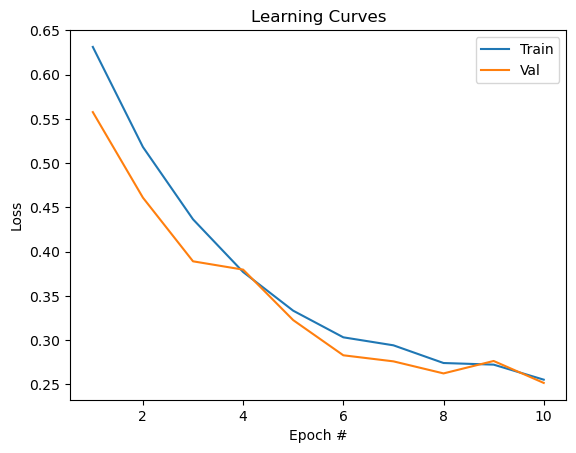

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.plot(np.arange(1, 11), train_loss_hist, label='Train')
plt.plot(np.arange(1, 11), val_loss_hist, label='Val')
plt.title('Learning Curves')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.show()

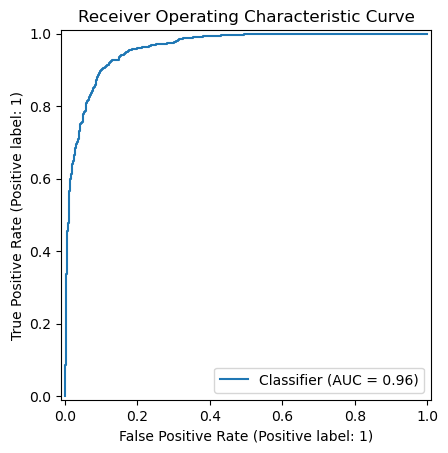

In [29]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(val_labels, val_preds)
plt.title('Receiver Operating Characteristic Curve')
plt.show()

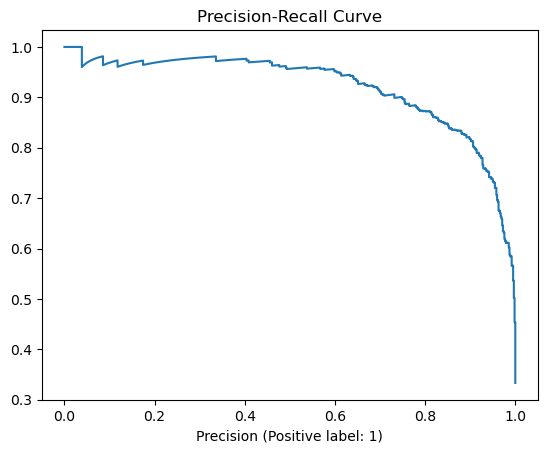

In [31]:
plt.figure()
plt.plot(recalls, precisions)
plt.xlabel('Recall (Positive label: 1)')
plt.xlabel('Precision (Positive label: 1)')
plt.title('Precision-Recall Curve')
plt.show()

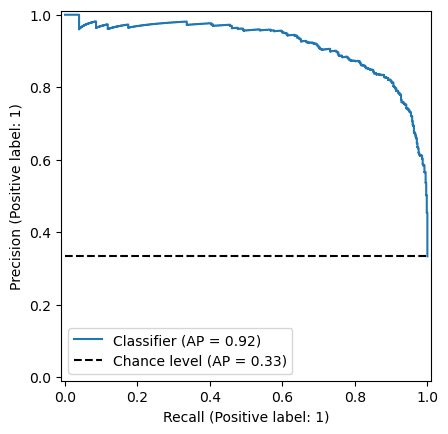

In [ ]:
PrecisionRecallDisplay.from_predictions(val_labels, val_preds, plot_chance_level=True)
plt.title('Precision-Recall Curve')
plt.show()